In [2]:
!pip install pytorch_pretrained_bert
!pip install seqeval

  Using cached pytorch_pretrained_bert-0.6.2-py3-none-any.whl (123 kB)


In [3]:
import pandas as pd
import numpy as np
from tqdm import tqdm, trange
import torch
from torch.optim import Adam
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from pytorch_pretrained_bert import BertTokenizer, BertConfig
from pytorch_pretrained_bert import BertForTokenClassification, BertAdam

In [1]:
import pandas as pd

In [7]:
#data=pd.read_csv('New_formatted_iter1.csv')
data = pd.read_csv("C:/Users/satwi/Desktop/test.csv",sep=",",encoding="latin1").fillna(method='ffill')

data.head(n=10)

sentences #        word  POS col3 Tag
0   sentence0        have  VBP    O   O
1   sentence0    disputed  VBN    O   O
2   sentence0      public   JJ    O   O
3   sentence0      record   NN    O   O
4   sentence0       items  NNS    O   O
5   sentence0        with   IN    O   O
6   sentence0  LexisNexis  NNP    O   O
7   sentence0           .    .    O   O
8   sentence0    response   NN    O   O
9   sentence0         was  VBD    O   O

In [8]:
column_values = data['sentences #']
unique_values =  pd.unique(column_values)

In [10]:
temp=data[data['sentences #']==i]
temp.head()

sentences #      word  POS col3 Tag
0   sentence0      have  VBP    O   O
1   sentence0  disputed  VBN    O   O
2   sentence0    public   JJ    O   O
3   sentence0    record   NN    O   O
4   sentence0     items  NNS    O   O

In [42]:
temp['sentences #']

41    sentence1
42    sentence1
43    sentence1
44    sentence1
45    sentence1
46    sentence1
47    sentence1
48    sentence1
49    sentence1
50    sentence1
51    sentence1
52    sentence1
53    sentence1
54    sentence1
55    sentence1
56    sentence1
57    sentence1
58    sentence1
59    sentence1
60    sentence1
61    sentence1
62    sentence1
63    sentence1
64    sentence1
65    sentence1
66    sentence1
67    sentence1
68    sentence1
69    sentence1
70    sentence1
71    sentence1
72    sentence1
73    sentence1
74    sentence1
75    sentence1
76    sentence1
77    sentence1
78    sentence1
79    sentence1
80    sentence1
81    sentence1
82    sentence1
83    sentence1
84    sentence1
85    sentence1
86    sentence1
87    sentence1
88    sentence1
89    sentence1
90    sentence1
91    sentence1
92    sentence1
93    sentence1
94    sentence1
95    sentence1
96    sentence1
97    sentence1
98    sentence1
99    sentence1
Name: sentences #, dtype: object

In [55]:
sentence_main=[]
POS_main=[]
col3_main=[]
Tag_main=[]
word_main=[]
for x in unique_values:
    sentence=[]
    POS=[]
    col3=[]
    Tag=[]
    word=[]
    temp=data[data['sentences #']==x].reset_index()
    for i in range(0,len(temp)):
        sentence.append(temp['sentences #'][i])
        word.append(temp['word'][i])
        POS.append(temp['POS'][i])
        col3.append(temp['col3'][i])
        Tag.append(temp['Tag'][i])
    sentence.append('')
    word.append('')
    POS.append('')
    col3.append('')
    Tag.append('')
    sentence_main.extend(sentence)
    word_main.extend(word)
    POS_main.extend(POS)
    col3_main.extend(col3)
    Tag_main.extend(Tag)

In [99]:
df = pd.DataFrame(list(zip( word_main,POS_main,col3_main,Tag_main)), 
               columns =['word_main', 'POS_main','col3_main','Tag_main']) 

In [100]:
df.to_csv(r'C:\\Users\\satwi\\Desktop\\data\\df.txt',sep=' ', index=False, header=True)


In [ ]:
1900,500,359

In [68]:
len(unique_values)

2759

In [93]:
column_values1 = test['sentence_main']
unique_values1 =  pd.unique(column_values1)
print(len(unique_values1))

IndexError: only integers, slices (`:`), ellipsis (`...`), numpy.newaxis (`None`) and integer or boolean arrays are valid indices

In [94]:
train=unique_values[0:1900]
test=unique_values[1900:2400]
valid=unique_values[2400:]

In [95]:
valid = df[df.sentence_main.isin(valid)]
test = df[df.sentence_main.isin(test)]
train = df[df.sentence_main.isin(train)]

In [83]:
train=train.drop(['sentence_main'], axis=1)
test=test.drop(['sentence_main'], axis=1)
valid=valid.drop(['sentence_main'], axis=1)

In [64]:
df.to_csv('C:\\Users\\satwi\\Desktop\\data\\train.csv')
df.to_csv('C:\\Users\\satwi\\Desktop\\data\\test.csv')
df.to_csv('C:\\Users\\satwi\\Desktop\\data\\valid.csv')

In [97]:
train.to_csv(r'C:\\Users\\satwi\\Desktop\\data\\train.txt',sep=' ', index=False, header=True)
test.to_csv(r'C:\\Users\\satwi\\Desktop\\data\\test.txt',sep=' ', index=False, header=True)
valid.to_csv(r'C:\\Users\\satwi\\Desktop\\data\\valid.txt',sep=' ', index=False, header=True)

In [60]:
pwd()

'C:\\Users\\satwi\\Downloads'

In [22]:
x='sentence0'

In [4]:
for i in unique_values:
    

['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'senten

 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 's

 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 's

 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 's

['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'senten

['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'sentence2' ... 'sentence3153' 'sentence3154'
 'sentence3155']
['sentence0' 'sentence1' 'senten

In [6]:
from google.colab import files
uploaded = files.upload()

Saving New_formatted_iter1.csv to New_formatted_iter1.csv


In [4]:
#data=pd.read_csv('New_formatted_iter1.csv')
data = pd.read_csv("C:/Users/satwi/Desktop/New_formatted_iter1.csv",sep=",",encoding="latin1").fillna(method='ffill')

data.head(n=10)

sentences #        word  POS Tag
0   sentence0        have  VBP   O
1   sentence0    disputed  VBN   O
2   sentence0      public   JJ   O
3   sentence0      record   NN   O
4   sentence0       items  NNS   O
5   sentence0        with   IN   O
6   sentence0  LexisNexis  NNP   O
7   sentence0           .    .   O
8   sentence0    response   NN   O
9   sentence0         was  VBD   O

In [102]:
data['word']=data['word'].str.lower()

In [101]:
data.dropna(inplace=True)

In [113]:
class SentenceGetter(object):
    def __init__(self, data):
        self.n_sent = 1
        self.data = data
        self.empty = False
        agg_func = lambda s: [(w, p, t) for w, p, t in zip(s["word"].values.tolist(),
                                                           s["POS"].values.tolist(),
                                                           s["Tag"].values.tolist())]
        self.grouped = self.data.groupby("sentences #").apply(agg_func)
        self.sentences = [s for s in self.grouped]
    
    def get_next(self):
        try:
            s = self.grouped["sentences : {}".format(self.n_sent)]
            self.n_sent += 1
            return s
        except:
            return None

In [114]:
getter = SentenceGetter(data)
sentences = getter.sentences

In [111]:
sentences = [[word[0] for word in sentence] for sentence in getter.sentences]
x=sentences[0]

In [115]:
labels = [[s[2] for s in sent] for sent in sentences]
sentences = [" ".join([s[0] for s in sent]) for sent in sentences]
sentences[0]

'have disputed public record items with lexisnexis . response was incomplete am victim of identity theft cards credit card number ssn driving license details are here 4556 7169 9272 3875 name andrew audley 6514845 6887536 .i requested method verification procedure used determine accuracy .'

In [33]:
len(sentences[2])

30

In [10]:
labels = [[s[2] for s in sentence] for sentence in getter.sentences]
print(labels[0])

['O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'MSK', 'O', 'O', 'O', 'MSK', 'MSK', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O', 'O']


In [11]:
tag_values = list(set(data["Tag"].values))
tag_values.append("PAD")
tag2idx = {t: i for i, t in enumerate(tag_values)}

In [12]:
!pip install transformers

In [13]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from transformers import BertTokenizer, BertConfig

from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split

torch.__version__

'1.3.1'

In [14]:
MAX_LEN = 75
bs = 32

In [15]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
n_gpu = torch.cuda.device_count()

In [16]:
tokenizer = BertTokenizer.from_pretrained('bert-base-cased', do_lower_case=False)


In [17]:
def tokenize_and_preserve_labels(sentence, text_labels):
    tokenized_sentence = []
    labels = []

    for word, label in zip(sentence, text_labels):

        # Tokenize the word and count # of subwords the word is broken into
        tokenized_word = tokenizer.tokenize(word)
        n_subwords = len(tokenized_word)

        # Add the tokenized word to the final tokenized word list
        tokenized_sentence.extend(tokenized_word)

        # Add the same label to the new list of labels `n_subwords` times
        labels.extend([label] * n_subwords)

    return tokenized_sentence, labels

In [18]:
tokenized_texts_and_labels = [
    tokenize_and_preserve_labels(sent, labs)
    for sent, labs in zip(sentences, labels)
]

In [19]:
tokenized_texts = [token_label_pair[0] for token_label_pair in tokenized_texts_and_labels]
labels = [token_label_pair[1] for token_label_pair in tokenized_texts_and_labels]

In [35]:
len(tokenized_texts[2])

61

In [23]:
input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                          maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")

In [42]:
input_ids[1]

array([ 7791,  1107,  1692,  1104, 11807, 10893,   164,   190,   119,
         188,   119,   172,   119,   166, 24950,   171, 25550,  1182,
        4430,  1115,  1191,  6792,  1118,  8440,  6136,  7791,  1215,
        4959, 10893,  2335,  1757,  1869,  4103,  1129,  2136,  4792,
        1259,  1671,  1271,  4134,  9015, 21816,  1200,  1869, 12017,
        3797,  1114,  1216,  7314,  1295,  1216,  9015, 21816,  1200,
         119,   178,  1138,  1168,  2666,  5756,  1336,  1138,  1151,
        4853,  2357,  4755,  4956,  4755,  3621,  4389,  1559,  1604,
        4573, 24050,  3615])

In [39]:
tags = pad_sequences([[tag2idx.get(l) for l in lab] for lab in labels],
                     maxlen=MAX_LEN, value=tag2idx["PAD"], padding="post",
                     dtype="long", truncating="post")

In [43]:
len(tags[1])

75

In [44]:
attention_masks = [[float(i != tag2idx["PAD"]) for i in ii] for ii in input_ids]

In [46]:
attention_masks[1]

[1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [47]:
tr_inputs, val_inputs, tr_tags, val_tags = train_test_split(input_ids, tags, 
                                                            random_state=2018, test_size=0.1)
tr_masks, val_masks, _, _ = train_test_split(attention_masks, input_ids,
                                             random_state=2018, test_size=0.1)

In [51]:
tr_inputs = torch.tensor(tr_inputs)
val_inputs = torch.tensor(val_inputs)
tr_tags = torch.tensor(tr_tags)
val_tags = torch.tensor(val_tags)
tr_masks = torch.tensor(tr_masks)
val_masks = torch.tensor(val_masks)

In [52]:
train_data = TensorDataset(tr_inputs, tr_masks, tr_tags)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=bs)

valid_data = TensorDataset(val_inputs, val_masks, val_tags)
valid_sampler = SequentialSampler(valid_data)
valid_dataloader = DataLoader(valid_data, sampler=valid_sampler, batch_size=bs)

In [53]:
import transformers
from transformers import BertForTokenClassification, AdamW

transformers.__version__


'2.8.0'

In [54]:
model = BertForTokenClassification.from_pretrained(
    "bert-base-cased",
    num_labels=len(tag2idx),
    output_attentions = False,
    output_hidden_states = False
)

In [0]:
model.cuda();

In [0]:
FULL_FINETUNING = True
if FULL_FINETUNING:
    param_optimizer = list(model.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.0}
    ]
else:
    param_optimizer = list(model.classifier.named_parameters()) 
    optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]

optimizer = AdamW(
    optimizer_grouped_parameters,        
    lr=3e-5,
    eps=1e-8
)

In [0]:
from transformers import get_linear_schedule_with_warmup

epochs = 3
max_grad_norm = 1.0

# Total number of training steps is number of batches * number of epochs.
total_steps = len(train_dataloader) * epochs

# Create the learning rate scheduler.
scheduler = get_linear_schedule_with_warmup(
    optimizer, 
    num_warmup_steps=0,
    
    num_training_steps=total_steps
)

In [0]:
from seqeval.metrics import f1_score
def flat_accuracy(preds, labels):
    pred_flat = np.argmax(preds, axis=2).flatten()
    labels_flat = labels.flatten()
    return np.sum(pred_flat == labels_flat) / len(labels_flat)

In [36]:
## Store the average loss after each epoch so we can plot them.
loss_values, validation_loss_values = [], []

for _ in trange(epochs, desc="Epoch"):
    # ========================================
    #               Training
    # ========================================
    # Perform one full pass over the training set.
    
    # Put the model into training mode.
    model.train()
    # Reset the total loss for this epoch.
    total_loss = 0

    # Training loop
    for step, batch in enumerate(train_dataloader):
        # add batch to gpu
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        # Always clear any previously calculated gradients before performing a backward pass.
        model.zero_grad()
        # forward pass
        # This will return the loss (rather than the model output)
        # because we have provided the `labels`.
        outputs = model(b_input_ids, token_type_ids=None,
                        attention_mask=b_input_mask, labels=b_labels)
        # get the loss
        loss = outputs[0]
        # Perform a backward pass to calculate the gradients.
        loss.backward()
        # track train loss
        total_loss += loss.item()    
        # Clip the norm of the gradient
        # This is to help prevent the "exploding gradients" problem.
        torch.nn.utils.clip_grad_norm_(parameters=model.parameters(), max_norm=max_grad_norm)
        # update parameters
        optimizer.step()
        # Update the learning rate.
        scheduler.step()
        
    # Calculate the average loss over the training data.
    avg_train_loss = total_loss / len(train_dataloader)
    print("Average train loss: {}".format(avg_train_loss))
    
    # Store the loss value for plotting the learning curve.
    loss_values.append(avg_train_loss)
    
    
    # ========================================
    #               Validation
    # ========================================
    # After the completion of each training epoch, measure our performance on
    # our validation set.
    
    # Put the model into evaluation mode
    model.eval()
    # Reset the validation loss for this epoch.
    eval_loss, eval_accuracy = 0, 0
    nb_eval_steps, nb_eval_examples = 0, 0
    predictions , true_labels = [], []
    for batch in valid_dataloader:
        batch = tuple(t.to(device) for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        
        # Telling the model not to compute or store gradients,
        # saving memory and speeding up validation
        with torch.no_grad():
            # Forward pass, calculate logit predictions.
            # This will return the logits rather than the loss because we have not provided labels.
            outputs = model(b_input_ids, token_type_ids=None,
                            attention_mask=b_input_mask, labels=b_labels)
        # Move logits and labels to CPU
        logits = outputs[1].detach().cpu().numpy()
        label_ids = b_labels.to('cpu').numpy()
        
        # Calculate the accuracy for this batch of test sentences.
        eval_loss += outputs[0].mean().item()
        eval_accuracy += flat_accuracy(logits, label_ids)
        predictions.extend([list(p) for p in np.argmax(logits, axis=2)])
        true_labels.append(label_ids)
        
        nb_eval_examples += b_input_ids.size(0)
        nb_eval_steps += 1
    
    eval_loss = eval_loss / nb_eval_steps
    validation_loss_values.append(eval_loss)
    print("Validation loss: {}".format(eval_loss))
    print("Validation Accuracy: {}".format(eval_accuracy/nb_eval_steps))
    pred_tags = [tag_values[p_i] for p in predictions for p_i in p]
    valid_tags = [tag_values[l_ii] for l in true_labels for l_i in l for l_ii in l_i]
    print("Validation F1-Score: {}".format(f1_score(pred_tags, valid_tags)))
    print()


Epoch:   0%|          | 0/3 [00:00<?, ?it/s]

Average train loss: 0.0634031665021888


Epoch:  33%|███▎      | 1/3 [00:38<01:16, 38.21s/it]

Validation loss: 0.006725106491810746
Validation Accuracy: 0.9973611111111111
Validation F1-Score: 0.9872557349192864

Average train loss: 0.005534500801914897


Epoch:  67%|██████▋   | 2/3 [01:16<00:38, 38.31s/it]

Validation loss: 0.006978351541975927
Validation Accuracy: 0.9969444444444444
Validation F1-Score: 0.9906382978723405

Average train loss: 0.0026504049030616162


Epoch: 100%|██████████| 3/3 [01:55<00:00, 38.64s/it]

Validation loss: 0.004505919177770718
Validation Accuracy: 0.9983333333333333
Validation F1-Score: 0.988936170212766



/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


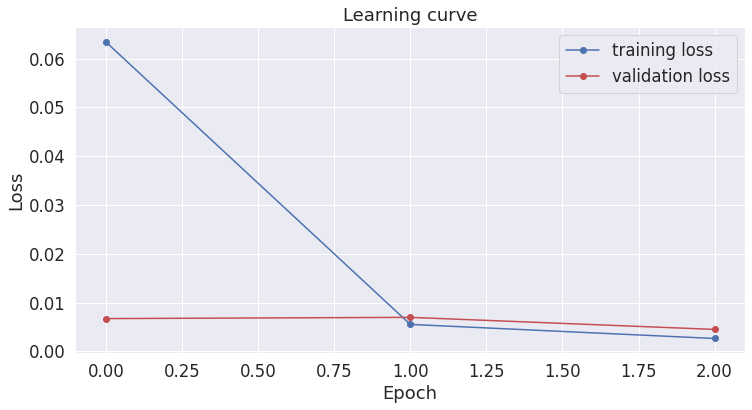

In [37]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Use plot styling from seaborn.
sns.set(style='darkgrid')

# Increase the plot size and font size.
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (12,6)

# Plot the learning curve.
plt.plot(loss_values, 'b-o', label="training loss")
plt.plot(validation_loss_values, 'r-o', label="validation loss")

# Label the plot.
plt.title("Learning curve")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

plt.show()


In [0]:
#test_sentence = """
#I never recieved any information about this debt, but its reporting on my credit report as late and closed. Here is my CC details 3479 949075 99308. 
#Please reslove the issue and my details are Driving license is 17411628, SSN 226-65-2895 "
#"""


test_sentence = """
463032, hi I want to inform you I had credit card CC number with 4666 4310 0980 4000 after that I decided to close this account 980. Please do the favour with the provided details Driving license is 222986078, SSN is 575-68-1621. 
"""

In [0]:
tokenized_sentence = tokenizer.encode(test_sentence)
input_ids = torch.tensor([tokenized_sentence]).cuda()

In [0]:
with torch.no_grad():
    output = model(input_ids)
label_indices = np.argmax(output[0].to('cpu').numpy(), axis=2)

In [0]:
# join bpe split tokens
tokens = tokenizer.convert_ids_to_tokens(input_ids.to('cpu').numpy()[0])
new_tokens, new_labels = [], []
for token, label_idx in zip(tokens, label_indices[0]):
    if token.startswith("##"):
        new_tokens[-1] = new_tokens[-1] + token[2:]
    else:
        new_labels.append(tag_values[label_idx])
        new_tokens.append(token)

In [54]:
for token, label in zip(new_tokens, new_labels):
    print("{}\t{}".format(label, token))

O	[CLS]
MSK	463032
O	,
O	hi
O	I
O	want
O	to
O	inform
O	you
O	I
O	had
O	credit
O	card
O	CC
O	number
O	with
MSK	4666
MSK	4310
MSK	0980
MSK	4000
O	after
O	that
O	I
O	decided
O	to
O	close
O	this
O	account
O	980
O	.
O	Please
O	do
O	the
O	favour
O	with
O	the
O	provided
O	details
O	Driving
O	license
O	is
MSK	222986078
O	,
O	SSN
O	is
MSK	575
MSK	-
MSK	68
MSK	-
MSK	1621
O	.
O	[SEP]


In [0]:
import pickle
pickle.dump(model, open('BERT_NER_v5', 'wb'))